<a href="https://colab.research.google.com/github/Nishant-codex/single_cell_analysis/blob/main/notebooks/Impedance_clustering_for_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have tried to summarize the findings with the FN protocol in this notebook. Here, I take the FN subthreshold voltage and input current and calculate the impedance on it. I have plotted imedance for Serotonin, Dopamine and aCSF

# all imports and functions 

In [4]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 

import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os 
import sys 

sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')

from utils import *
from UMAP_utils import *  

In [5]:
sys.path.append(os.getcwd()+'/../scripts')

In [6]:
from impedance import *
from utils import *

# Get Data for impedance

In [55]:
NFFT = 0.01 * 20001

NFFT2 = int(np.floor(NFFT/2))
NFFT = int(2 * NFFT2)
# (0:(1/timelen):(NFFT2-1)/timelen)'
fas = np.arange(0, (NFFT2-1)/0.01, 0.01)

In [17]:
Imp_data = pd.read_pickle("D:/CurrentClamp/Impedance.pkl")

In [66]:
def normalizeBytheFirstValue(data_matrix):
    npmat = np.array(data_matrix)
    firstVal = npmat[0, :]
    remaining = data_matrix
    remaining = remaining/firstVal
    all = np.zeros_like(npmat)
    # all[0, :] = firstVal/firstVal
    # all[1:, :] = remaining
    return remaining

In [95]:
Imp_norm = normalizeBytheFirstValue(np.vstack(Imp_data_acsf['impedance']).T)[:50]


50

In [100]:
np.shape(Imp_norm.T)

(442, 50)

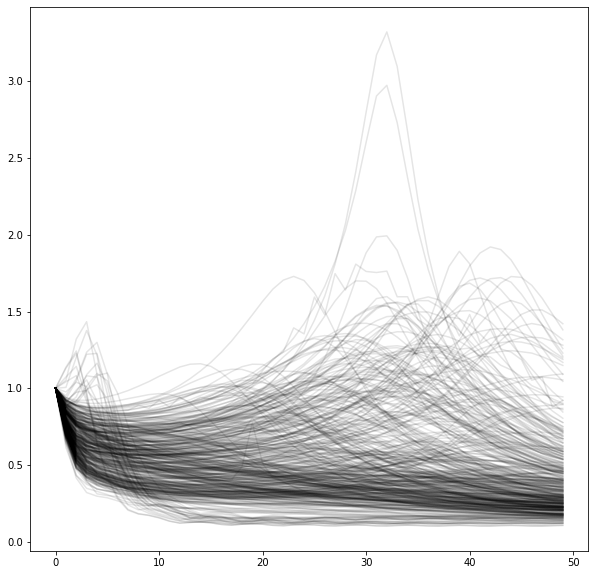

In [96]:
fig,ax = plt.subplots(1,figsize=[10,10])
plt.plot(fas[:len(Imp_data_acsf['impedance'][0])][:50]/0.01, Imp_norm,c='black',alpha=0.1)
plt.show()

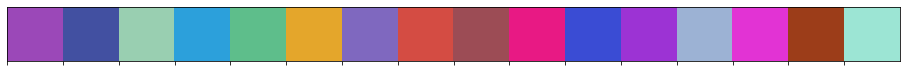

In [84]:
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.6,	0.812, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.5,	0.41 , 0.75],
                    [0.834,	0.3 , 0.265],
                    [0.612,	0.3 , 0.334],
                    [0.912,	0.1 , 0.52],
                    [0.23,	0.3 , 0.834],
                    [0.612,	0.2 , 0.834],
                    [0.612,	0.7 , 0.834],
                    [0.89,	0.2 , 0.834],
                    [0.612,	0.24 , 0.1],
                    [0.612,	0.9 , 0.834]]

sns.palplot(coherence_colors)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


3


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


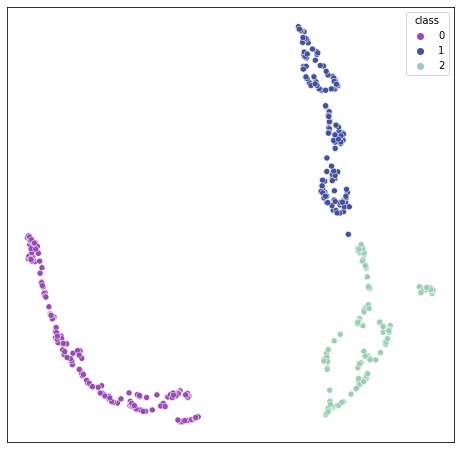

In [102]:
labels,mapper,reducer = plot_UMAP_clusters_single(Imp_norm.T,20,0.01,0.1,42,c_list=coherence_colors)

In [103]:
Imp_data_acsf['labels_lv'] = labels

<ipython-input-103-547ee6c60a12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Imp_data_acsf['labels_lv'] = labels


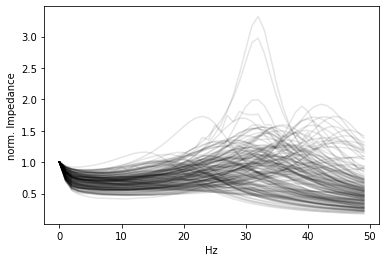

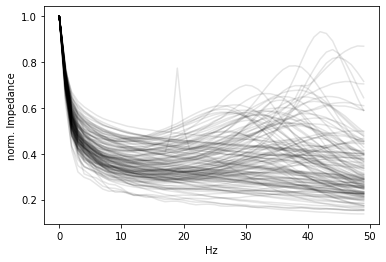

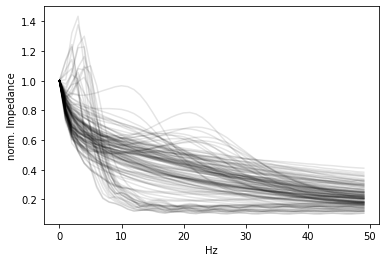

In [119]:
for i in list(set(Imp_data_acsf.labels_lv)):
    Imp_norm_ = normalizeBytheFirstValue(np.vstack(Imp_data_acsf[Imp_data_acsf.labels_lv==i]['impedance']).T)[:50]

    plt.plot(Imp_norm_,c='black',alpha=0.1)
    plt.xlabel('Hz')
    plt.ylabel('norm. Impedance')
    plt.show()

In [8]:
data = loadmatInPy("D:/Analyzed/asli_2-8-19_E1_analyzed.mat")

In [9]:
[pwrdac, fasdac] = makespectrumt(spoordac, time, dacrate)

NameError: name 'spoordac' is not defined

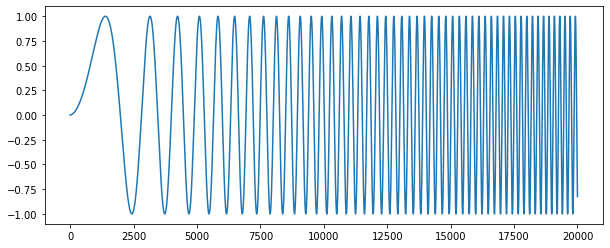

In [206]:
def return_zap(f0,f1,fs,t0,t1):
    f0 = f0
    f1 = f1
    fs = fs
    t0 = t0
    t1 = t1
    T = t1-t0
    c = (f1-f0)/T 
    t = np.arange(t0,(t1),1/fs)
    phi_0 = 0 
    zap = np.sin(phi_0+(2*np.pi*(c/2)*t+f0)*t)
    return zap 

fig,ax = plt.subplots(figsize=[10,4])
ax.plot(return_zap(1,100,20000,0,1))


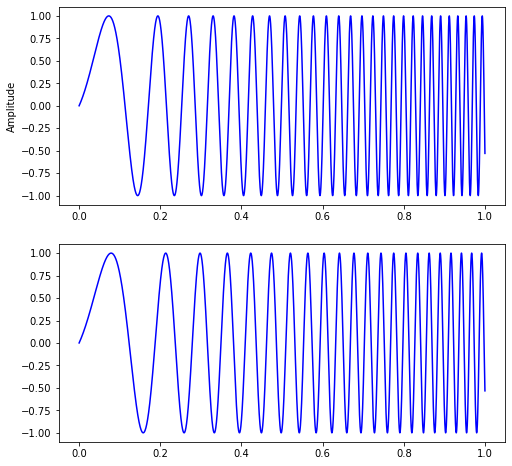

In [290]:
# sampling rate
sr = 20000.0
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

# frequency of the signal
freq = 20   
# y1 = np.sin(2*np.pi*freq*t)
y1 = return_zap(10,60,20000,0,1)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y1, 'b')
plt.ylabel('Amplitude')

# plt.show()
plt.subplot(212)
y2 = return_zap(10,50,20000,0,1)
plt.plot(t,y2,c='b')
plt.show()
# freq = 10   
# y = np.sin(2*np.pi*freq*t)

# plt.subplot(212)
# plt.plot(t, y, 'b')
# plt.ylabel('Amplitude')

# plt.xlabel('Time (s)')
# plt.show()

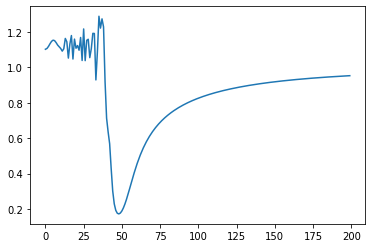

In [294]:
from scipy.fft import fft, fftshift
L = len(y1)
Fs =20000

fft1 = fft(y1)
fft2 = fft(y2)
f_s1 = np.abs(fftshift(fft1))
f_s2 = np.abs(fftshift(fft2))

f = Fs/2 * np.linspace(-1,1-2/L,L)
imp = f_s2/f_s1
plt.plot(f[len(f)//2:len(f)//2+200], imp[len(f)//2:len(f)//2+200])


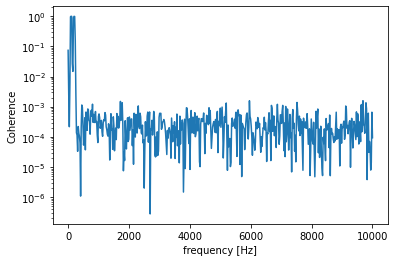

In [279]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()



# sampling rate
sr = 20000.0
# sampling interval
ts = 1.0/sr
t = np.arange(0,100,ts)

s2 = return_zap(10,50, sr,0,100.)

x = np.cos(2*np.pi*100*t) + np.sin(2*np.pi*200*t) + 0.5*np.random.randn(len(t))
y = 0.5*np.cos(2*np.pi*100*t - np.pi/4) + 0.35*np.sin(2*np.pi*200*t - np.pi/2) + 0.5*np.random.randn(len(t))


s1= return_zap(10,50,sr,0,100.)

f, Cxy = signal.coherence(x, y, sr,'hann',1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()



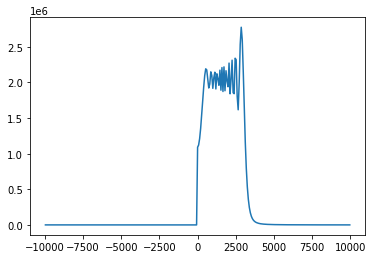

In [202]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(y2))**2

time_step = 1 / 20000
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

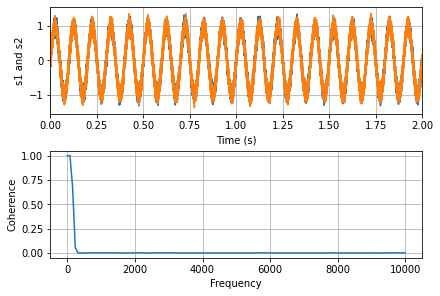

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 1/20000
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1/10
s2 = np.sin(2 * np.pi * 10 * t) + nse2/10

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')

plt.show()

# Plots for impedance under different conditions 

## Mean Impedance under different conditions

In [ ]:
#@title
sag_mean_exc = np.mean(sag_exc,axis=0)
dop_mean_exc = np.mean(dop_exc,axis=0)
acsf_mean_exc = np.mean(acsf_exc,axis=0)
sag_mean_inh = np.mean(sag_inh,axis=0)
dop_mean_inh = np.mean(dop_inh,axis=0)
acsf_mean_inh = np.mean(acsf_inh,axis=0)

sag_std_exc = np.std(sag_exc,axis=0)
dop_std_exc = np.std(dop_exc,axis=0)
acsf_std_exc = np.std(acsf_exc,axis=0)
sag_std_inh = np.std(sag_inh,axis=0)
dop_std_inh = np.std(dop_inh,axis=0)
acsf_std_inh = np.std(acsf_inh,axis=0)

fig,ax = plt.subplots(1,2,figsize=[18,9])
ax[0].plot(sag_mean_exc)
ax[0].plot(dop_mean_exc)
ax[0].plot(acsf_mean_exc)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('F(Hz)')
ax[0].set_ylabel('impedance(mOhm)')
ax[0].set_title('Exc impedance drug v acsf')


ax[1].plot(sag_mean_inh)
ax[1].plot(dop_mean_inh)
ax[1].plot(acsf_mean_inh)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('F(Hz)')
ax[1].set_ylabel('impedance(mOhm')
ax[1].set_title('Inh impedance drug v acsf')

plt.show()

NameError: ignored

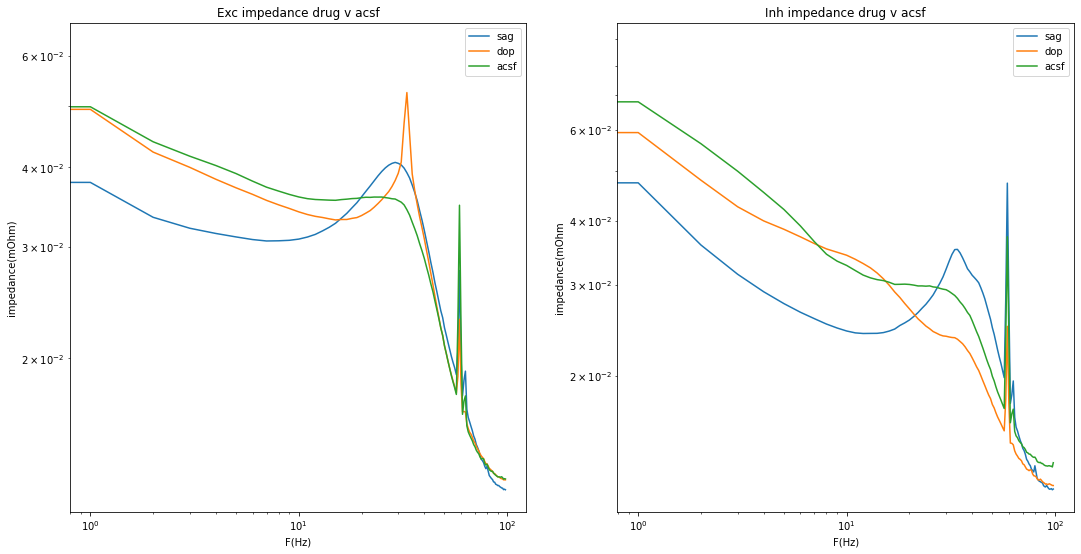

In [ ]:
#@title
sag_mean_exc = np.mean(sag_exc,axis=0)
dop_mean_exc = np.mean(dop_exc,axis=0)
acsf_mean_exc = np.mean(acsf_exc,axis=0)
sag_mean_inh = np.mean(sag_inh,axis=0)
dop_mean_inh = np.mean(dop_inh,axis=0)
acsf_mean_inh = np.mean(acsf_inh,axis=0)

sag_std_exc = np.std(sag_exc,axis=0)
dop_std_exc = np.std(dop_exc,axis=0)
acsf_std_exc = np.std(acsf_exc,axis=0)
sag_std_inh = np.std(sag_inh,axis=0)
dop_std_inh = np.std(dop_inh,axis=0)
acsf_std_inh = np.std(acsf_inh,axis=0)

fig,ax = plt.subplots(1,2,figsize=[18,9])
ax[0].plot(sag_mean_exc)
ax[0].plot(dop_mean_exc)
ax[0].plot(acsf_mean_exc)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('F(Hz)')
ax[0].set_ylabel('impedance(mOhm)')
ax[0].legend(['sag','dop','acsf'])
ax[0].set_title('Exc impedance drug v acsf')


ax[1].plot(sag_mean_inh)
ax[1].plot(dop_mean_inh)
ax[1].plot(acsf_mean_inh)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('F(Hz)')
ax[1].set_ylabel('impedance(mOhm')
ax[1].legend(['sag','dop','acsf'])
ax[1].set_title('Inh impedance drug v acsf')

plt.show()

In [ ]:
#@title
ci = 1.96 * sag_std_exc/np.sqrt(len(sag_std_exc))

fig, ax = plt.subplots()
ax.plot(sag_std_exc)
ax.fill_between(sag_std_exc, (sag_std_exc-ci), (sag_std_exc+ci), color='b', alpha=.1)

plt.figure(figsize=(10,8))
plt.plot(sag_std_exc)
plt.plot(dop_std_exc)
plt.plot(acsf_std_exc)
plt.xscale('log')
plt.yscale('log')
plt.legend(['sag','dop','acsf'])
plt.show()
plt.figure(figsize=(10,8))
plt.plot(sag_std_inh)
plt.plot(dop_std_inh)
plt.plot(acsf_std_inh)
plt.xscale('log')
plt.yscale('log')
plt.legend(['sag','dop','acsf'])
plt.show()

#save acsf

In [ ]:
import pickle 
with open('/content/gdrive/MyDrive/all_imp_acsf.p', 'wb') as fh:
   pickle.dump({'acsf_exc':acsf_exc,
                'acsf_inh':acsf_inh}, fh)

#save conditions



In [ ]:
#@title
import pickle 
with open('/content/gdrive/MyDrive/all_imp.p', 'wb') as fh:
   pickle.dump({'sag_exc':sag_exc,
                'sag_inh':sag_inh,
                'sag_exc_acsf':sag_exc_acsf,
                'sag_inh_acsf':sag_inh_acsf,
                'dop_exc':dop_exc,
                'dop_inh':dop_inh,
                'dop_exc_acsf':dop_exc_acsf,
                'dop_inh_acsf':dop_inh_acsf }, fh)



# Load Impedance Data for conditions
 

In [ ]:
d = pickle.load(open('/content/gdrive/MyDrive/all_imp.p', 'rb'))

In [ ]:
import seaborn as sns 
dop_exc_all = {'dop_exc_all':[]}
sag_exc_all = {'sag_exc_all':[]}
sag_exc_acsf_all = {'sag_exc_acsf_all':[]}
dop_exc_acsf_all = {'dop_exc_acsf_all':[]}
dop_inh_all = {'dop_inh_all':[]}
sag_inh_all = {'sag_inh_all':[]}
sag_inh_acsf_all = {'sag_inh_acsf_all':[]}
dop_inh_acsf_all = {'dop_inh_acsf_all':[]}
for i in d.keys():
  if i == 'sag_exc':
    for j in d[i]:
      sag_exc_all['sag_exc_all'] = np.concatenate((sag_exc_all['sag_exc_all'],j))
  if i == 'sag_exc_acsf':
    for j in d[i]:
      sag_exc_acsf_all['sag_exc_acsf_all'] = np.concatenate((sag_exc_acsf_all['sag_exc_acsf_all'],j))
  if i == 'sag_inh':
    for j in d[i]:
      sag_inh_all['sag_inh_all'] = np.concatenate((sag_inh_all['sag_inh_all'],j))
  if i == 'sag_inh_acsf':
    for j in d[i]:
      sag_inh_acsf_all['sag_inh_acsf_all'] = np.concatenate((sag_inh_acsf_all['sag_inh_acsf_all'],j))
  if i == 'dop_exc':
    for j in d[i]:
      dop_exc_all['dop_exc_all'] = np.concatenate((dop_exc_all['dop_exc_all'],j))
  if i == 'dop_exc_acsf':
    for j in d[i]:
      dop_exc_acsf_all['dop_exc_acsf_all'] = np.concatenate((dop_exc_acsf_all['dop_exc_acsf_all'],j))
  if i == 'dop_inh':
    for j in d[i]:
      dop_inh_all['dop_inh_all'] = np.concatenate((dop_inh_all['dop_inh_all'],j))
  if i == 'dop_inh_acsf':
    for j in d[i]:
      dop_inh_acsf_all['dop_inh_acsf_all'] = np.concatenate((dop_inh_acsf_all['dop_inh_acsf_all'],j))      


In [ ]:
everything = [dop_exc_all,
sag_exc_all,
sag_exc_acsf_all,
dop_exc_acsf_all,
dop_inh_all,
sag_inh_all,
sag_inh_acsf_all,
dop_inh_acsf_all]
size = []
all = []
for j in everything:
  
  size.append(j[list(j.keys())[0]].shape)
  all.append(j[list(j.keys())[0]])
empty_arr = np.zeros((len(everything),max(size)[0]))*np.nan

In [ ]:
for i in range(len(everything)):
  empty_arr[i,:len(all[i])] = all[i]

  


In [ ]:
df = pd.DataFrame(columns=['dop_exc_all',
'sag_exc_all',
'sag_exc_acsf_all',
'dop_exc_acsf_all',
'dop_inh_all',
'sag_inh_all',
'sag_inh_acsf_all',
'dop_inh_acsf_all'])
for i,cols in enumerate(df.columns):df[cols] = empty_arr[i,:]


,dop_exc_all,sag_exc_all,sag_exc_acsf_all,dop_exc_acsf_all,dop_inh_all,sag_inh_all,sag_inh_acsf_all,dop_inh_acsf_all
0,0.061402,0.095012,0.104080,0.057296,0.150126,0.050886,0.052505,0.062841
1,0.045242,0.077701,0.087305,0.042354,0.127982,0.035494,0.036474,0.046952
2,0.035905,0.070483,0.080892,0.033900,0.107150,0.028419,0.029298,0.038107
3,0.032152,0.067202,0.076338,0.030642,0.093320,0.026715,0.027456,0.033471
4,0.030013,0.062752,0.070435,0.028416,0.083198,0.025888,0.026592,0.030701
...,...,...,...,...,...,...,...,...
2965,NaN,NaN,NaN,NaN,0.011366,NaN,NaN,0.011417
2966,NaN,NaN,NaN,NaN,0.011364,NaN,NaN,0.011342
2967,NaN,NaN,NaN,NaN,0.011337,NaN,NaN,0.011334
2968,NaN,NaN,NaN,NaN,0.011241,NaN,NaN,0.011313


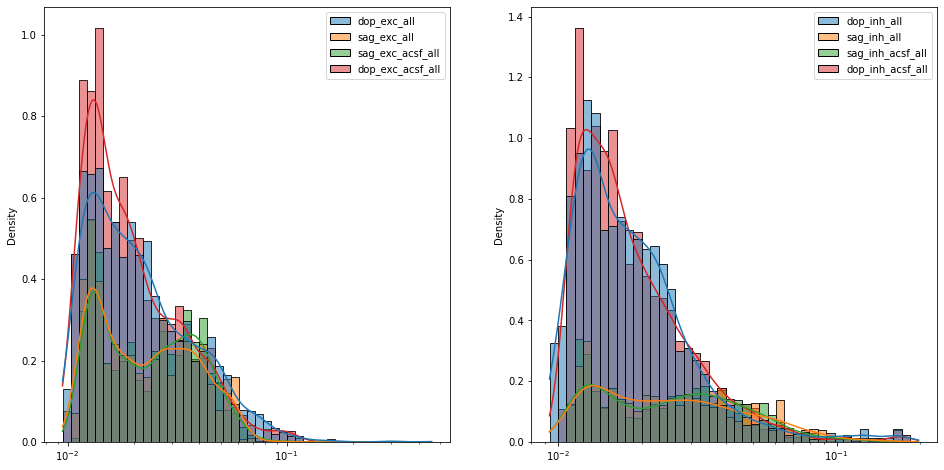

In [ ]:
import seaborn as sns 
fig,ax = plt.subplots(1,2,figsize=[16,8])
sns.histplot(data= df[df.columns[:4]],kde=True,stat='density',ax=ax[0],log_scale=True)
sns.histplot(data= df[df.columns[4:]],kde=True,stat='density',ax=ax[1],log_scale=True)
plt.show()

In [ ]:
d_acsf = pickle.load(open('/content/gdrive/MyDrive/all_imp_acsf.p', 'rb'))

In [ ]:
def divideByTheFirstValue(data):
  if type(data) != np.ndarray:
    data = np.array(data) 
  for i in range(data.shape[0]):
    data[i,:] = data[i,:]/data[i,0]
  return data

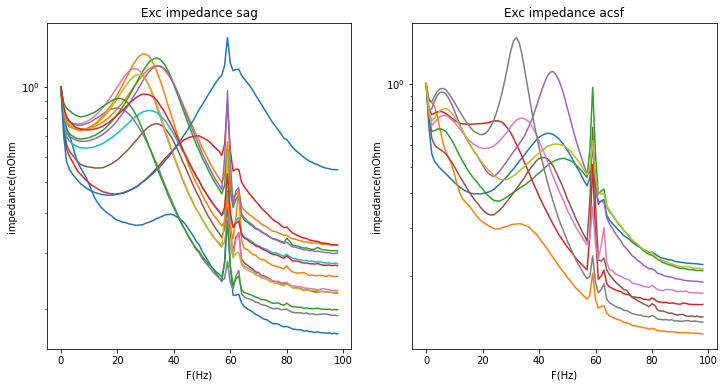

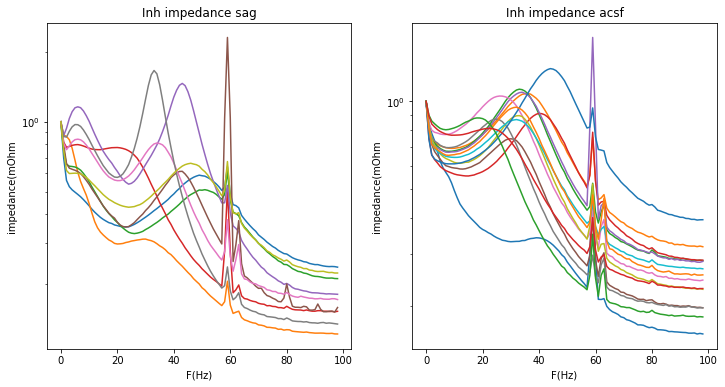

In [ ]:
plotConditionsWithacsf(condition='sag',
                       acsf_inh=divideByTheFirstValue(d['sag_inh_acsf']),
                       acsf_exc=divideByTheFirstValue(d['sag_exc_acsf']),
                       cond_inh=divideByTheFirstValue(d['sag_inh']),
                       cond_exc=divideByTheFirstValue(d['sag_exc']))

Text(0.5, 1.0, 'Serotonin inh impedance acsf')

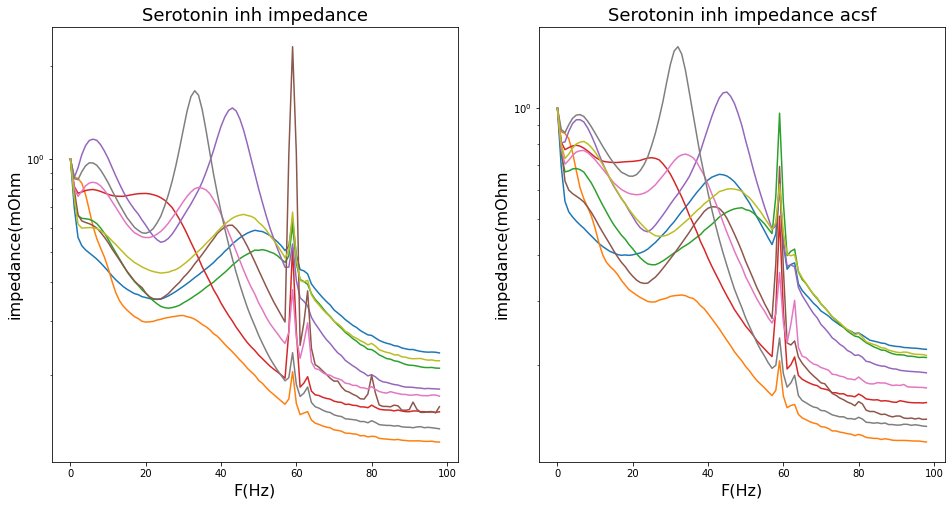

In [ ]:
fig,ax = plt.subplots(1,2,figsize=[16,8])
data1 = divideByTheFirstValue(d['sag_inh'])
ax[0].plot(data1.T)
# ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('F(Hz)',fontsize=16)
ax[0].set_ylabel('impedance(mOhm',fontsize=16)
ax[0].set_title('Serotonin inh impedance',fontsize=18)

data1 = divideByTheFirstValue(d['sag_inh_acsf'])
ax[1].plot(data1.T)
# ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('F(Hz)',fontsize=16)
ax[1].set_ylabel('impedance(mOhm',fontsize=16)
ax[1].set_title('Serotonin inh impedance acsf',fontsize=18)


Text(0.5, 1.0, 'Serotonin exc impedance acsf')

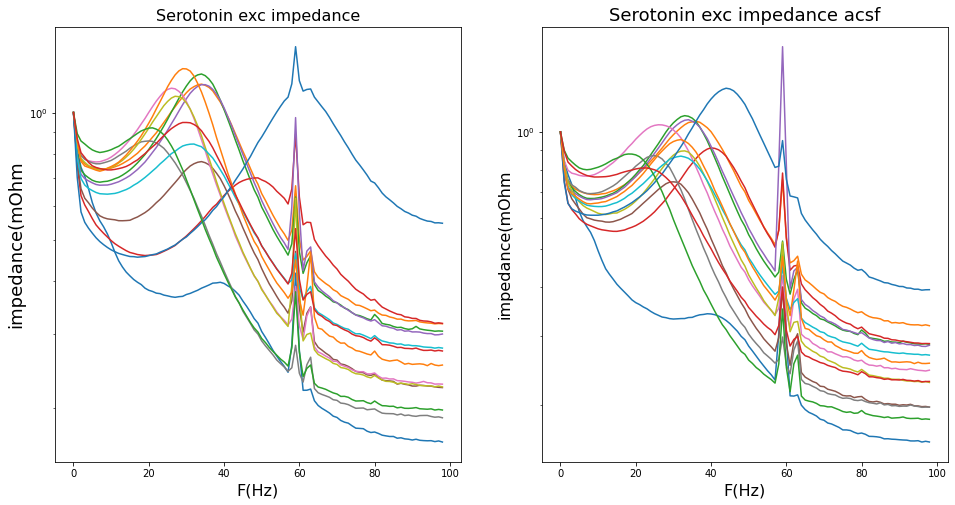

In [ ]:
#@title
fig,ax = plt.subplots(1,2,figsize=[16,8])
data1 = divideByTheFirstValue(d['sag_exc'])
ax[0].plot(data1.T)
# ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('F(Hz)',fontsize=16)
ax[0].set_ylabel('impedance(mOhm',fontsize=18)
ax[0].set_title('Serotonin exc impedance',fontsize=16)

data1 = divideByTheFirstValue(d['sag_exc_acsf'])
ax[1].plot(data1.T)
# ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('F(Hz)',fontsize=16)
ax[1].set_ylabel('impedance(mOhm',fontsize=16)
ax[1].set_title('Serotonin exc impedance acsf',fontsize=18)


Text(0.5, 1.0, 'Dop Inh impedance acsf')

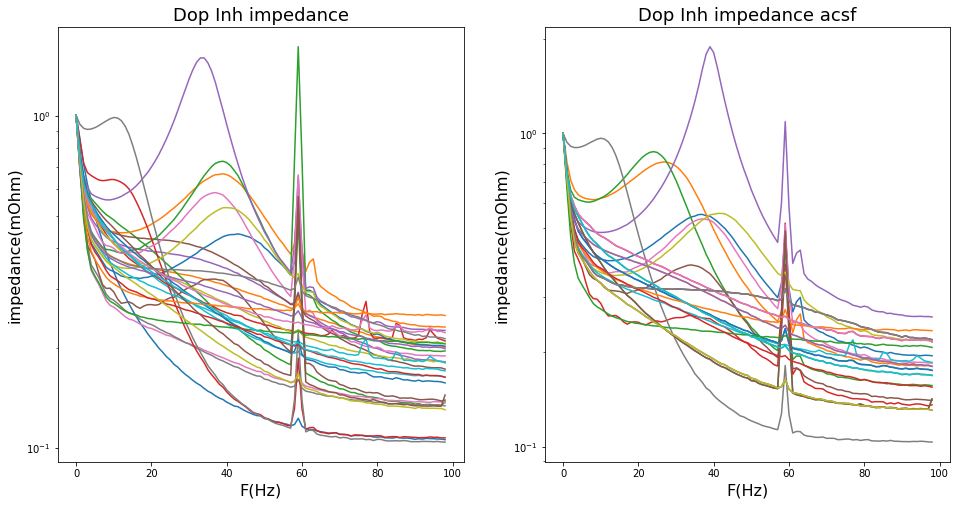

In [ ]:
fig,ax = plt.subplots(1,2,figsize=[16,8])
data1 = divideByTheFirstValue(d['dop_inh'])
ax[0].plot(data1.T)
# ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('F(Hz)',fontsize=16)
ax[0].set_ylabel('impedance(mOhm)',fontsize=16)
ax[0].set_title('Dop Inh impedance',fontsize=18)

data1 = divideByTheFirstValue(d['dop_inh_acsf'])
ax[1].plot(data1.T)
# ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('F(Hz)',fontsize=16)
ax[1].set_ylabel('impedance(mOhm)',fontsize=16)
ax[1].set_title('Dop Inh impedance acsf',fontsize=18)


Text(0.5, 1.0, 'Dop Exc impedance acsf')

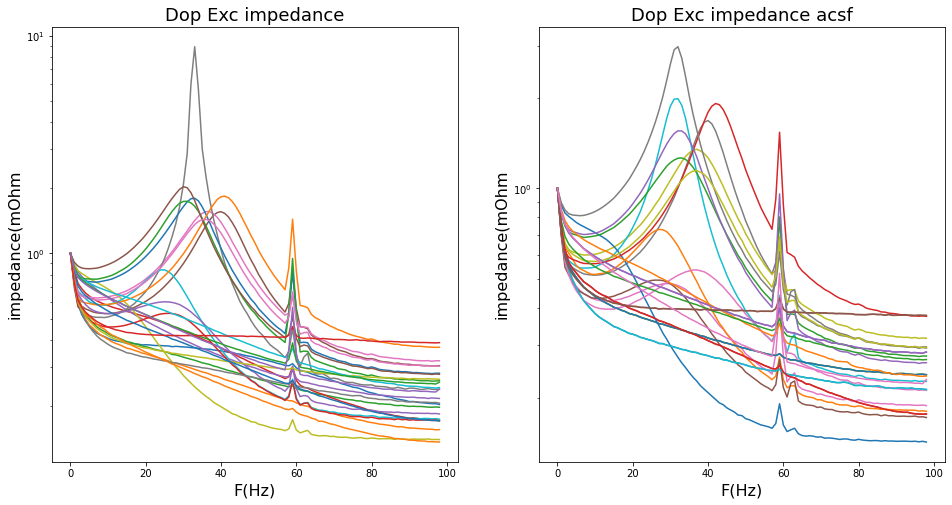

In [ ]:
fig,ax = plt.subplots(1,2,figsize=[16,8])
data1 = divideByTheFirstValue(d['dop_exc'])
ax[0].plot(data1.T)
# ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('F(Hz)',fontsize=16)
ax[0].set_ylabel('impedance(mOhm',fontsize=16)
ax[0].set_title('Dop Exc impedance',fontsize=18)

data1 = divideByTheFirstValue(d['dop_exc_acsf'])
ax[1].plot(data1.T)
# ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('F(Hz)',fontsize=16)
ax[1].set_ylabel('impedance(mOhm',fontsize=16)
ax[1].set_title('Dop Exc impedance acsf',fontsize=18)


## Exc vs Inh Impedance under different conditions (avg)

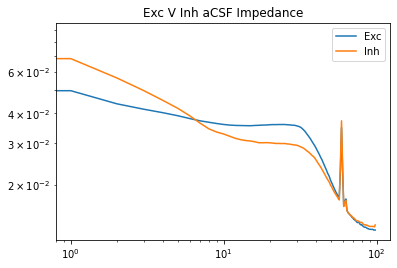

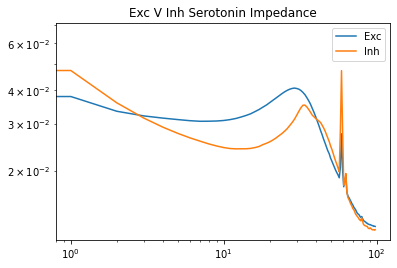

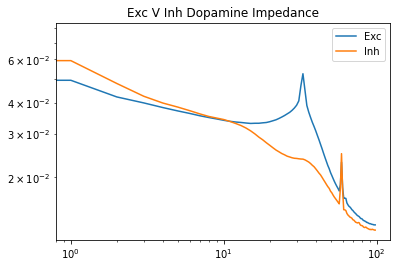

In [ ]:
#@title
plt.plot(np.mean(acsf_exc,axis=0))
plt.plot(np.mean(acsf_inh,axis=0))
plt.xscale('log')
plt.yscale('log')
plt.legend(['Exc','Inh'])
plt.title('Exc V Inh aCSF Impedance')
plt.show()

plt.plot(np.mean(sag_exc,axis=0))
plt.plot(np.mean(sag_inh,axis=0))
plt.xscale('log')
plt.yscale('log')
plt.legend(['Exc','Inh'])
plt.title('Exc V Inh Serotonin Impedance')

plt.show()

plt.plot(np.mean(dop_exc,axis=0))
plt.plot(np.mean(dop_inh,axis=0))
plt.xscale('log')
plt.yscale('log')
plt.legend(['Exc','Inh'])
plt.title('Exc V Inh Dopamine Impedance')

plt.show()

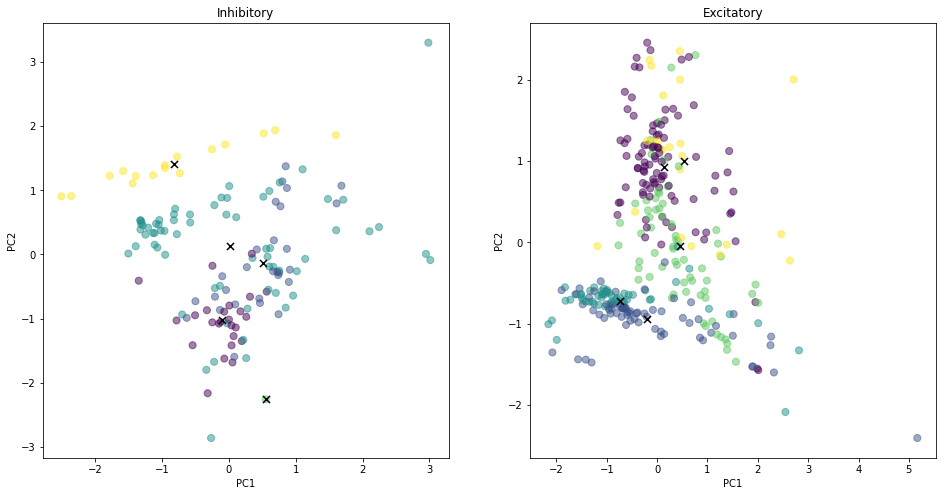

In [ ]:
#@title PCA aCSF
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_exc= scalar.fit_transform(d_acsf['acsf_exc'])
data_inh= scalar.fit_transform(d_acsf['acsf_inh'])

pca_x = PCA(n_components=10,whiten=True)#.fit_transform(total_imp[:281,:])

fig, ax = plt.subplots(1,2,figsize=[16,8])

# Project the data in 2D
#total_imp[:281,:]
reduced_data_inh = pca_x.fit_transform(data_inh)
n_components = 2

kmeans = KMeans(n_clusters=5).fit(reduced_data_inh)
centroids_inh = kmeans.cluster_centers_
label = kmeans.labels_.astype(float)
xs = np.repeat('x',281)
os = np.repeat('o',418-281)
mark = np.concatenate((xs,os))
mark
labels  = [] 
for i in  kmeans.labels_.astype(float):
  if i ==0:
    labels.append('r')
  if i ==1:
    labels.append('b')
  if i ==2:
    labels.append('green')
  if i ==3:
    labels.append('cyan')
  if i ==4:
    labels.append('purple')                
ax[0].scatter(reduced_data_inh[:,0], reduced_data_inh[:,1], c=label, s=50, alpha=0.5,marker = 'o')
ax[0].scatter(centroids_inh[:, 0], centroids_inh[:, 1],c='black', s=50,marker = 'x')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Inhibitory')
# plt.show()

pca_x = PCA(n_components=10,whiten=True)#.fit_transform(total_imp[:281,:])

# Project the data in 2D
#total_imp[:281,:]
reduced_data_exc = pca_x.fit_transform(data_exc)
n_components = 2

kmeans = KMeans(n_clusters=5).fit(reduced_data_exc)
centroids_exc = kmeans.cluster_centers_
label = kmeans.labels_.astype(float)
xs = np.repeat('x',281)
os = np.repeat('o',418-281)
mark = np.concatenate((xs,os))
mark
labels  = [] 
for i in  kmeans.labels_.astype(float):
  if i ==0:
    labels.append('r')
  if i ==1:
    labels.append('b')
  if i ==2:
    labels.append('green')
  if i ==3:
    labels.append('cyan')
  if i ==4:
    labels.append('purple')                
ax[1].scatter(reduced_data_exc[:,0], reduced_data_exc[:,1], c=label, s=50, alpha=0.5,marker = 'o')
ax[1].scatter(centroids_exc[:, 0], centroids_exc[:, 1],c='black', s=50,marker = 'x')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Excitatory')
plt.show()

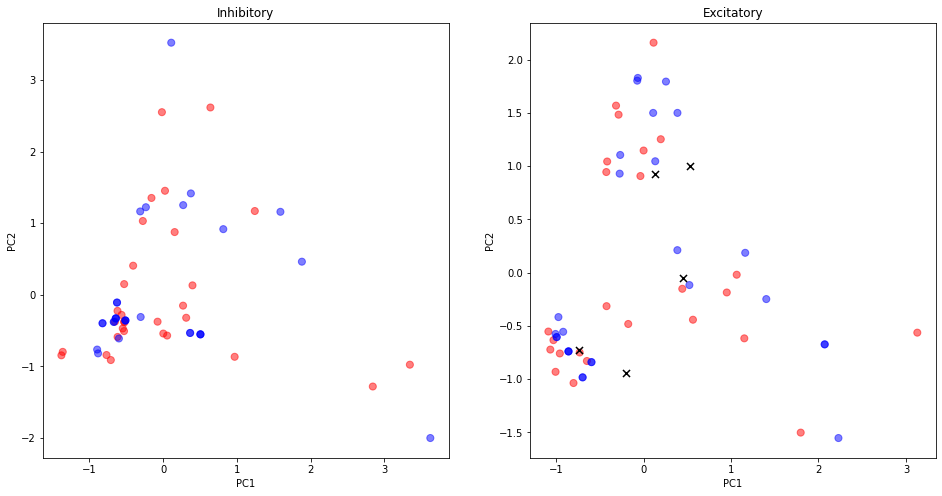

In [ ]:
#@title PCA Dopamine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
data_exc_dop = scalar.fit_transform(d['dop_exc'])
data_inh_dop = scalar.fit_transform(d['dop_inh'])
data_exc_dop_acsf = scalar.fit_transform(d['dop_exc_acsf'])
data_inh_dop_acsf = scalar.fit_transform(d['dop_inh_acsf'])
c1_dop_inh=np.repeat('red',len(data_inh_dop))
c2_dop_inh=np.repeat('blue',len(data_inh_dop_acsf))

c1_dop_exc = np.repeat('red',len(data_exc_dop))
c2_dop_exc = np.repeat('blue',len(data_exc_dop_acsf))

data_inh_dop = np.concatenate((data_inh_dop,data_inh_dop_acsf),axis=0)
data_exc_dop = np.concatenate((data_exc_dop,data_exc_dop_acsf),axis=0)

pca_x = PCA(n_components=10,whiten=True)

fig, ax = plt.subplots(1,2,figsize=[16,8])

# Project the data in 2D
reduced_data_inh = pca_x.fit_transform(data_inh_dop)
n_components = 2
label_inh_dop = np.concatenate((c1_dop_inh,c2_dop_inh))
label_exc_dop = np.concatenate((c1_dop_exc,c2_dop_exc))
            
ax[0].scatter(reduced_data_inh[:,0], reduced_data_inh[:,1], c=label_inh_dop, s=50, alpha=0.5,marker = 'o')
# ax[0].scatter(centroids_inh[:, 0], centroids_inh[:, 1],c='black', s=50,marker = 'x')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Inhibitory')
# plt.show()

pca_x = PCA(n_components=10,whiten=True)

# Project the data in 2D
reduced_data_exc = pca_x.fit_transform(data_exc_dop)
n_components = 2

           
ax[1].scatter(reduced_data_exc[:,0], reduced_data_exc[:,1], c=label_exc_dop, s=50, alpha=0.5,marker = 'o')
ax[1].scatter(centroids_exc[:, 0], centroids_exc[:, 1],c='black', s=50,marker = 'x')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Excitatory')
plt.show()

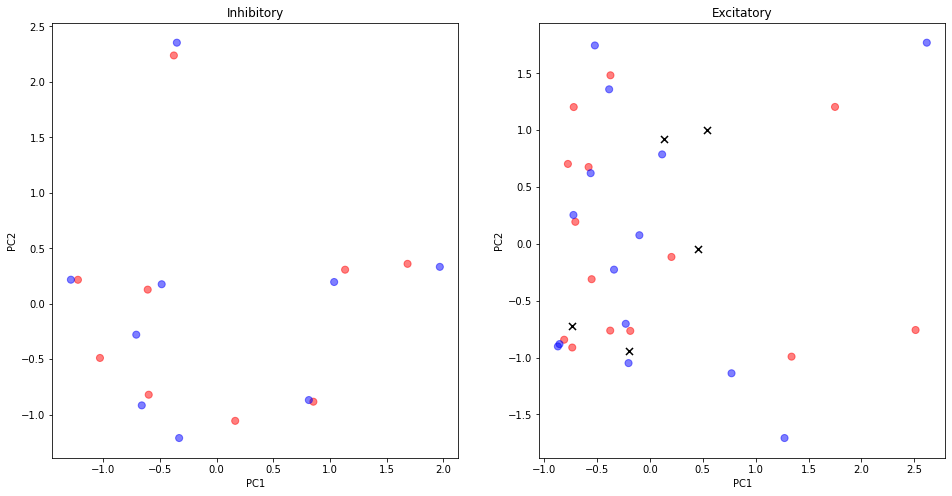

In [ ]:
#@title PCA serotonin
scalar = StandardScaler()
data_exc_sag = scalar.fit_transform(d['sag_exc'])
data_inh_sag = scalar.fit_transform(d['sag_inh'])
data_exc_sag_acsf = scalar.fit_transform(d['sag_exc_acsf'])
data_inh_sag_acsf = scalar.fit_transform(d['sag_inh_acsf'])
c1_sag_inh=np.repeat('red',len(data_inh_sag))
c2_sag_inh=np.repeat('blue',len(data_inh_sag_acsf))

c1_sag_exc = np.repeat('red',len(data_exc_sag))
c2_sag_exc = np.repeat('blue',len(data_exc_sag_acsf))

data_inh_sag = np.concatenate((data_inh_sag,data_inh_sag_acsf),axis=0)
data_exc_sag = np.concatenate((data_exc_sag,data_exc_sag_acsf),axis=0)

pca_x = PCA(n_components=10,whiten=True)

fig, ax = plt.subplots(1,2,figsize=[16,8])

# Project the data in 2D
reduced_data_inh = pca_x.fit_transform(data_inh_sag)
n_components = 2
label_inh_sag = np.concatenate((c1_sag_inh,c2_sag_inh))
label_exc_sag = np.concatenate((c1_sag_exc,c2_sag_exc))
            
ax[0].scatter(reduced_data_inh[:,0], reduced_data_inh[:,1], c=label_inh_sag, s=50, alpha=0.5,marker = 'o')
# ax[0].scatter(centroids_inh[:, 0], centroids_inh[:, 1],c='black', s=50,marker = 'x')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('Inhibitory')
# plt.show()

pca_x = PCA(n_components=10,whiten=True)

# Project the data in 2D
reduced_data_exc = pca_x.fit_transform(data_exc_sag)
n_components = 2

           
ax[1].scatter(reduced_data_exc[:,0], reduced_data_exc[:,1], c=label_exc_sag, s=50, alpha=0.5,marker = 'o')
ax[1].scatter(centroids_exc[:, 0], centroids_exc[:, 1],c='black', s=50,marker = 'x')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('Excitatory')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA in

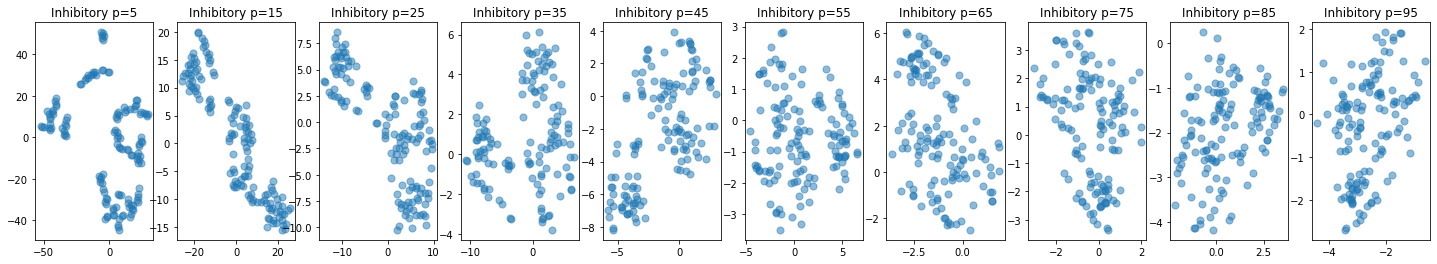

In [ ]:
#@title 

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
data = data_inh

# Project the data in 2D
reduced_data = pca_x.transform(data)
n_components = 2
perplexity_ = np.arange(5,100,10)
fig, ax = plt.subplots(1,len(perplexity_),figsize=[25,4])

for p,j in enumerate(perplexity_):
  tsne = manifold.TSNE(
      n_components=n_components,
      init="pca",
      random_state=0,
      perplexity=j,
      learning_rate="auto",
      n_iter=1000,)

  reduced_data = tsne.fit_transform(np.array(data))         
  ax[p].scatter(reduced_data[:,0], reduced_data[:,1],  s=50, alpha=0.5,marker = 'o')
  ax[p].set_title('Inhibitory p='+str(j))
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA in

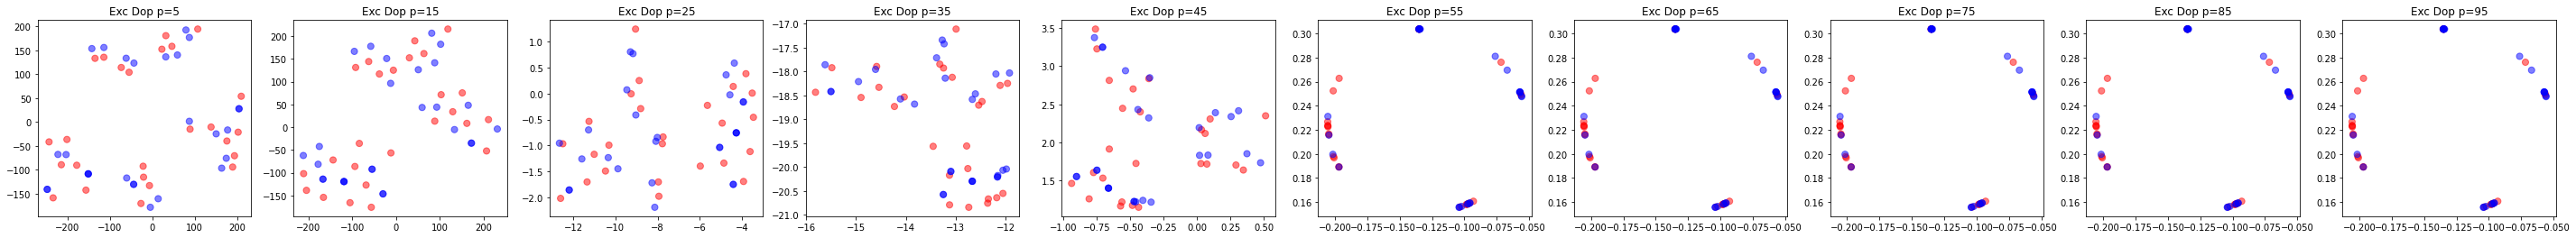

In [ ]:

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
data = data_exc_dop

# Project the data in 2D
n_components = 2
perplexity_ = np.arange(5,100,10)
fig, ax = plt.subplots(1,len(perplexity_),figsize=[5*len(perplexity_),4])

for p,j in enumerate(perplexity_):
  tsne = manifold.TSNE(
      n_components=n_components,
      init="pca",
      random_state=0,
      perplexity=j,
      learning_rate="auto",
      n_iter=1000,)

  reduced_data = tsne.fit_transform(np.array(data))         
  ax[p].scatter(reduced_data[:,0], reduced_data[:,1], c=label_exc_dop, s=50, alpha=0.5,marker = 'o')
  ax[p].set_title('Exc Dop p='+str(j))
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA in

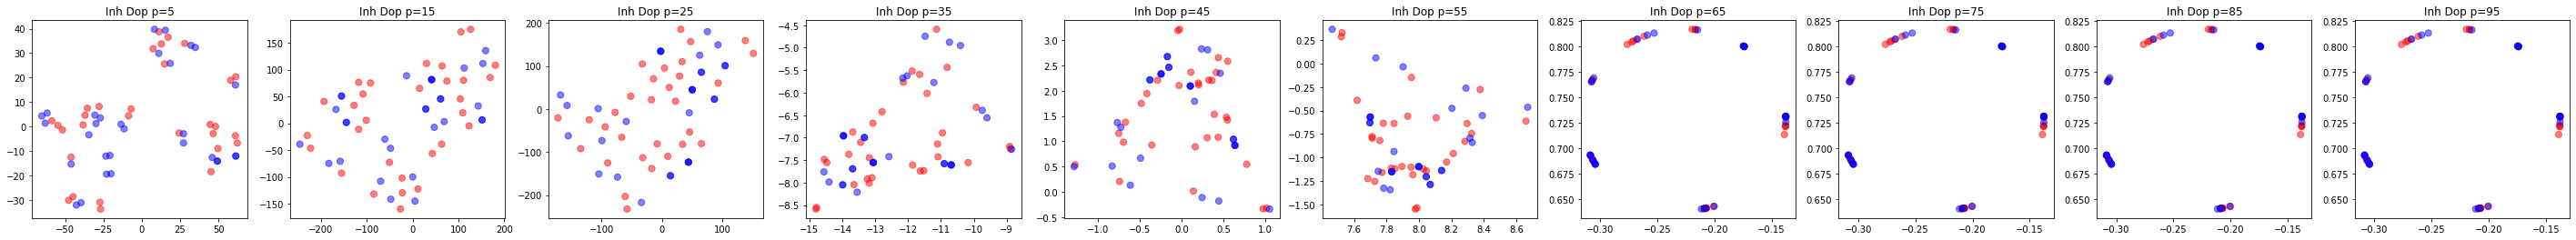

In [ ]:

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
data = data_inh_dop

# Project the data in 2D
n_components = 2
perplexity_ = np.arange(5,100,10)
fig, ax = plt.subplots(1,len(perplexity_),figsize=[5*len(perplexity_),4])

for p,j in enumerate(perplexity_):
  tsne = manifold.TSNE(
      n_components=n_components,
      init="pca",
      random_state=0,
      perplexity=j,
      learning_rate="auto",
      n_iter=1000,)

  reduced_data = tsne.fit_transform(np.array(data))         
  ax[p].scatter(reduced_data[:,0], reduced_data[:,1], c=label_inh_dop, s=50, alpha=0.5,marker = 'o')
  ax[p].set_title('Inh Dop p='+str(j))
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA in

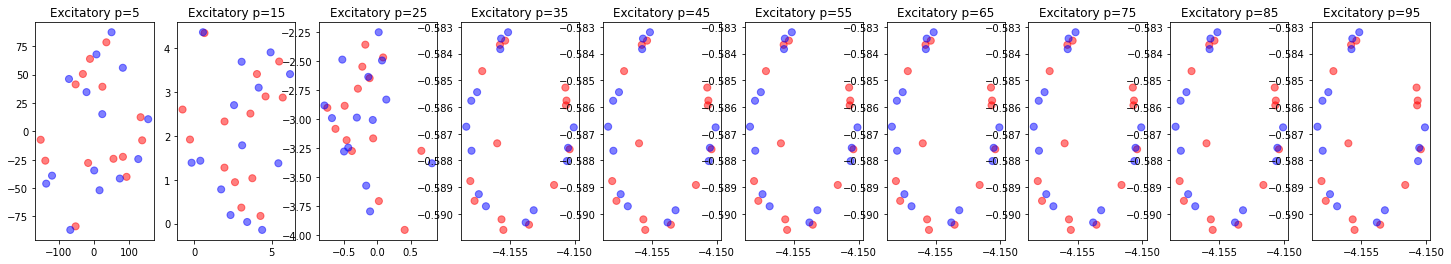

In [ ]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
data = data_exc_sag

# Project the data in 2D
n_components = 2
perplexity_ = np.arange(5,100,10)
fig, ax = plt.subplots(1,len(perplexity_),figsize=[25,4])

for p,j in enumerate(perplexity_):
  tsne = manifold.TSNE(
      n_components=n_components,
      init="pca",
      random_state=0,
      perplexity=j,
      learning_rate="auto",
      n_iter=1000,)

  reduced_data = tsne.fit_transform(np.array(data))         
  ax[p].scatter(reduced_data[:,0], reduced_data[:,1], c=label_exc_sag, s=50, alpha=0.5,marker = 'o')
  ax[p].set_title('Excitatory p='+str(j))
plt.show()